# Will your employees leave you?

A hackerearth Machine Learning challenge for predicting the employee attrition rate in organizations

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Spectral')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
Train=pd.read_csv('Train.csv')
Test=pd.read_csv('Test.csv')

In [4]:
#seperating the target column
target=Train.Attrition_rate

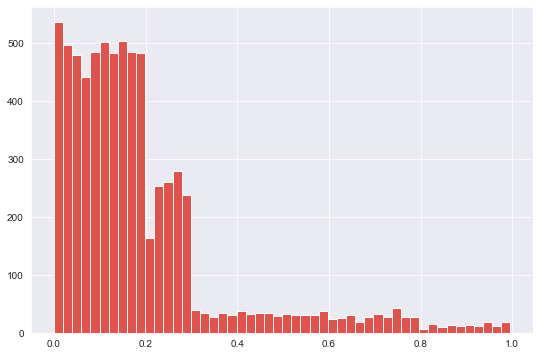

In [5]:
target.hist(bins=50,figsize=(9,6))

In [6]:
#Joining both the train and test data to preprocess
df=Train.drop("Attrition_rate",axis=1).append(Test).reset_index(drop=True)

In [7]:
df.shape

(10000, 23)

In [8]:
df.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2


Creating a Function that constructs % Missing Values

In [9]:
def missing(data,x=5):
    data_info=pd.DataFrame(index=data.columns)
    data_info['% missing']=[sum(data[i].isnull())/len(data[i])*100 for i in data_info.index]
    data_info['value_count']=[ dict(data[i].value_counts()) for i in data_info.index]
    data_info['data_type']=[data[i].dtypes for i in data_info.index]
    data_info=data_info.sort_values(by='% missing',ascending=False)
    return data_info.head(x)
missing(df,23)

,% missing,value_count,data_type
VAR4,9.54,"{2.0: 6369, 1.0: 1809, 3.0: 868}",float64
VAR2,7.94,"{0.7516: 3582, -0.1048: 2288, -0.9612: 1469, -...",float64
Age,5.73,"{22.0: 347, 27.0: 336, 25.0: 320, 26.0: 305, 5...",float64
Time_of_service,1.96,"{6.0: 755, 5.0: 700, 3.0: 687, 4.0: 653, 2.0: ...",float64
Work_Life_balance,0.16,"{1.0: 2951, 3.0: 2858, 2.0: 2287, 4.0: 1719, 5...",float64
Pay_Scale,0.12,"{8.0: 1964, 6.0: 1820, 5.0: 1640, 4.0: 1405, 7...",float64
Employee_ID,0.00,"{'EID_18020': 1, 'EID_11044': 1, 'EID_7031': 1...",object
VAR6,0.00,"{8: 3809, 7: 2509, 6: 1647, 5: 1283, 9: 752}",int64
VAR5,0.00,"{3: 3926, 2: 2993, 4: 2073, 1: 687, 5: 321}",int64
VAR3,0.00,"{-0.4537: 4755, 0.7075: 3362, 1.8688: 888, -1....",float64


All the missing data columns looks numerical i.e. `float64` lets check

In [10]:
#filtering continous data cols from all numerical cols
col=[]
for i in ['VAR4', 'VAR2', 'Age', 'Time_of_service', 'Work_Life_balance','Pay_Scale']:
    if len(df[i].value_counts())>10:
        col.append(i)

In [11]:
col

['Age', 'Time_of_service']

Only 2 columns out of 6 are continious

`This is very important because now the remaining 4 will be treated as a categorical column and imputation will be made accordingly`

Imputing these missing values

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
#for numerical
imputer=SimpleImputer(strategy='median')

In [14]:
num_df=pd.DataFrame(imputer.fit_transform(df[col]),columns=col)

In [15]:
num_df.head()

,Age,Time_of_service
0,42.0,4.0
1,24.0,5.0
2,58.0,27.0
3,26.0,4.0
4,31.0,5.0


In [16]:
#for categorical from numercial cols
imputer=SimpleImputer(strategy='most_frequent')

In [17]:
col=['VAR4', 'VAR2','Work_Life_balance','Pay_Scale']

In [18]:
cat_df=pd.DataFrame(imputer.fit_transform(df[col]),columns=col)

In [19]:
cat_df.head()

,VAR4,VAR2,Work_Life_balance,Pay_Scale
0,2.0,0.7516,3.0,7.0
1,2.0,-0.9612,4.0,6.0
2,3.0,-0.9612,1.0,8.0
3,2.0,-1.8176,1.0,8.0
4,2.0,0.7516,3.0,2.0


In [20]:
updated_col=['VAR4', 'VAR2','Work_Life_balance','Pay_Scale','Age', 'Time_of_service']

Getting the column names that are not imputed and are in their raw form

In [21]:
raw_col=[]
for i in df.columns:
    if i not in updated_col:
        raw_col.append(i)

In [22]:
raw_col

['Employee_ID',
 'Gender',
 'Education_Level',
 'Relationship_Status',
 'Hometown',
 'Unit',
 'Decision_skill_possess',
 'Time_since_promotion',
 'growth_rate',
 'Travel_Rate',
 'Post_Level',
 'Compensation_and_Benefits',
 'VAR1',
 'VAR3',
 'VAR5',
 'VAR6',
 'VAR7']

In [23]:
df1=pd.concat([df[raw_col],num_df,cat_df],axis=1)

In [24]:
df1.head()

,Employee_ID,Gender,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_since_promotion,growth_rate,Travel_Rate,...,VAR3,VAR5,VAR6,VAR7,Age,Time_of_service,VAR4,VAR2,Work_Life_balance,Pay_Scale
0,EID_23371,F,4,Married,Franklin,IT,Conceptual,4,33,1,...,1.8688,4,5,3,42.0,4.0,2.0,0.7516,3.0,7.0
1,EID_18000,M,3,Single,Springfield,Logistics,Analytical,4,36,0,...,-0.4537,3,5,3,24.0,5.0,2.0,-0.9612,4.0,6.0
2,EID_3891,F,3,Married,Clinton,Quality,Conceptual,3,51,0,...,-0.4537,3,8,3,58.0,27.0,3.0,-0.9612,1.0,8.0
3,EID_17492,F,3,Single,Lebanon,Human Resource Management,Behavioral,3,56,1,...,-0.4537,3,7,3,26.0,4.0,2.0,-1.8176,1.0,8.0
4,EID_22534,F,1,Married,Springfield,Logistics,Conceptual,4,62,1,...,-0.4537,2,8,2,31.0,5.0,2.0,0.7516,3.0,2.0


**These ['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6','VAR7']  column values are not properly defined in the problem statement so lets have a look over them**

In [25]:
for i in ['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6','VAR7']:
    print(i.upper())
    print(df1[i].value_counts())
    print("______________________________________\n")

VAR1
3    6025
4    1941
2    1026
1     510
5     498
Name: VAR1, dtype: int64
______________________________________

VAR2
 0.7516    4376
-0.1048    2288
-0.9612    1469
-1.8176    1173
 1.6081     694
Name: VAR2, dtype: int64
______________________________________

VAR3
-0.4537    4755
 0.7075    3362
 1.8688     888
-1.6150     709
-2.7762     286
Name: VAR3, dtype: int64
______________________________________

VAR4
2.0    7323
1.0    1809
3.0     868
Name: VAR4, dtype: int64
______________________________________

VAR5
3    3926
2    2993
4    2073
1     687
5     321
Name: VAR5, dtype: int64
______________________________________

VAR6
8    3809
7    2509
6    1647
5    1283
9     752
Name: VAR6, dtype: int64
______________________________________

VAR7
3    5619
4    1921
5    1149
2     899
1     412
Name: VAR7, dtype: int64
______________________________________



Converting these columns value into object type so that we can apply one hot encoding

In [26]:
for i in ['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6','VAR7']:
    df1[i]=df1[i].astype(str)

In [27]:
#Storing the employee id into a variable because we dont want to convert this into 1 hot representation
E_id=df1.Employee_ID

In [28]:
#applying one hot encoding
df2=pd.get_dummies(df1.drop("Employee_ID",axis=1),drop_first=True)
df2['Employee_ID']=E_id

In [29]:
#seperating the training data
train_df=df2.loc[:6999].drop('Employee_ID',axis=1)

In [30]:
#without emp id
train_df.head()

,Education_Level,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Age,Time_of_service,Work_Life_balance,Pay_Scale,Gender_M,...,VAR7_2,VAR7_3,VAR7_4,VAR7_5,VAR4_2.0,VAR4_3.0,VAR2_-0.9612,VAR2_-1.8176,VAR2_0.7516,VAR2_1.6081
0,4,4,33,1,1,42.0,4.0,3.0,7.0,0,...,0,1,0,0,1,0,0,0,1,0
1,3,4,36,0,3,24.0,5.0,4.0,6.0,1,...,0,1,0,0,1,0,1,0,0,0
2,3,3,51,0,2,58.0,27.0,1.0,8.0,0,...,0,1,0,0,0,1,1,0,0,0
3,3,3,56,1,3,26.0,4.0,1.0,8.0,0,...,0,1,0,0,1,0,0,1,0,0
4,1,4,62,1,3,31.0,5.0,3.0,2.0,0,...,1,0,0,0,1,0,0,0,1,0


In [31]:
#seperating the test data
test_df=df2.loc[7000:]
target_df=train_df.copy()
target_df['target']=target

Splitting the training data into further train and test sets for validating the model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size=0.3,random_state=42)

# Model building

In [34]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

In [35]:
def fit_predict(model,param):
    gs=GridSearchCV(model,param,cv=5,scoring='neg_root_mean_squared_error',verbose=1,n_jobs=-1)
    gs.fit(X_train,y_train)
    tuned=gs.best_params_
    er1=(1-(mean_squared_error(y_train,gs.predict(X_train)))**0.5)*100 #for training set error
    er2=(1-(mean_squared_error(y_test,gs.predict(X_test)))**0.5)*100 #for testing set error
    model_name=str(model).split('(')[0]
    return (tuned,er1,er2,model_name)

**Lasso**

In [36]:
fit_predict(Lasso(),{'alpha':np.arange(0.02,1.0,0.1),'normalize':[True,False]})

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.0s finished


({'alpha': 0.02, 'normalize': True},
 81.62190749277603,
 80.97555277644301,
 'Lasso')

**RandomForestRegressor**

In [37]:
fit_predict(RandomForestRegressor(),{'n_estimators':[800,1000,1200],'max_depth':[1,3],'min_samples_leaf':[0.05],'max_features':[0.01,"log2",'sqrt'],'oob_score':[True,False]})

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.0min finished


({'max_depth': 1,
  'max_features': 0.01,
  'min_samples_leaf': 0.05,
  'n_estimators': 800,
  'oob_score': True},
 81.62497166828179,
 80.97678283798348,
 'RandomForestRegressor')

**DecisionTreeRegressor**

In [38]:
fit_predict(DecisionTreeRegressor(),{'max_depth':[7,8,9], 'max_features':[0.009,0.01,0.02], 'min_samples_leaf':[0.05,0.06,0.07]})

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    0.7s finished


({'max_depth': 8, 'max_features': 0.01, 'min_samples_leaf': 0.05},
 81.62190749277603,
 80.97555277644301,
 'DecisionTreeRegressor')

**SVR**

In [51]:
fit_predict(SVR(),{'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001]})

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.6min finished


({'C': 0.1, 'gamma': 1}, 85.3115196205884, 80.95380962092155, 'SVR')

**XGBRegressor**

In [39]:
fit_predict(XGBRegressor(),{'n_estimators':[100,300,500],'max_depth':[3,5,7],'gamma':[1,0.1,0.05,0.01],'learning_rate':[0.05,0.1]})

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 16.7min finished


({'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300},
 81.62190749277252,
 80.97555300638749,
 'XGBRegressor')

<font size ='4'>There are many features lets use random forest to filter out non-important features</font>

In [42]:
print(f"No. of features in the data = {X_train.shape[1]}")

No. of features in the data = (4900, 59)


In [43]:
model=RandomForestRegressor(min_samples_leaf=0.05, max_depth= 3,n_estimators= 1000,max_features=0.01,oob_score=True)

In [44]:
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=0.01, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.05,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
#An array that represents imprortance of each feature
model.feature_importances_

array([0.03370711, 0.0346543 , 0.04289651, 0.02881771, 0.03797702,
       0.0362311 , 0.02975959, 0.02830496, 0.03365154, 0.03774319,
       0.01785508, 0.01484283, 0.02071921, 0.01488562, 0.01854289,
       0.        , 0.03720931, 0.0225795 , 0.        , 0.00727437,
       0.        , 0.        , 0.        , 0.01539162, 0.01589215,
       0.        , 0.0194757 , 0.02699005, 0.02455867, 0.        ,
       0.01365352, 0.0224762 , 0.        , 0.01543634, 0.02013844,
       0.0145103 , 0.        , 0.        , 0.        , 0.02378072,
       0.00947018, 0.02202726, 0.021477  , 0.01121951, 0.        ,
       0.01422707, 0.01820578, 0.02340892, 0.00063929, 0.00572795,
       0.02386764, 0.018635  , 0.02651693, 0.01754232, 0.00973508,
       0.02759625, 0.01256142, 0.02718686, 0.        ])

In [46]:
feat=pd.DataFrame(list(model.feature_importances_),index=X_train.columns).sort_values(0,ascending=False)

In [47]:
feat

,0
growth_rate,0.042897
Post_Level,0.037977
Gender_M,0.037743
Unit_IT,0.037209
Age,0.036231
Time_since_promotion,0.034654
Education_Level,0.033707
Pay_Scale,0.033652
Time_of_service,0.029760
Travel_Rate,0.028818


In [48]:
#extracting features with 
cols_drop=feat[feat[0]==0].index

In [49]:
#dropping un important features from train and test data
x_train=X_train.drop(cols_drop,axis=1)
x_test=X_test.drop(cols_drop,axis=1)

Creating models instance with tunned parameters

In [69]:
lasso=Lasso(alpha=0.02, normalize=True)
dtree=DecisionTreeRegressor(max_depth= 8, max_features=0.01, min_samples_leaf= 0.05)
rforest=RandomForestRegressor(max_depth= 1,max_features=0.01,min_samples_leaf=0.05,n_estimators=800,oob_score=True)
svr=SVR(C=0.1, gamma= 1)
xgb=XGBRegressor(gamma= 1, learning_rate= 0.1, max_depth=3, n_estimators= 300)

In [70]:
model_data=[]
for model in [lasso,dtree,rforest,svr,xgb]:
    model.fit(x_train,y_train)
    er1=(1-(mean_squared_error(y_train,model.predict(x_train)))**0.5)*100 #for training set error
    er2=(1-(mean_squared_error(y_test,model.predict(x_test)))**0.5)*100 #for testing set error
    model_name=str(model).split('(')[0]
    model_data.append([model_name,er2,er1])
model_data=pd.DataFrame(model_data)

In [78]:
model_data.columns=["Model","Test_error","Train_error"]

In [79]:
model_data.sort_values('Test_error',ascending=False).reset_index(drop=True)

,Model,Test_error,Train_error
0,RandomForestRegressor,80.976466,81.625491
1,XGBRegressor,80.975553,81.621907
2,Lasso,80.975553,81.621907
3,DecisionTreeRegressor,80.956871,81.629010
4,SVR,80.953811,85.311512


Applying the best model on the test Data

In [80]:
ensemble=RandomForestRegressor(min_samples_leaf=0.05, max_depth= 3,n_estimators= 1000,max_features=0.01,oob_score=True)#81.54

In [81]:
test_df.reset_index(drop=True,inplace=True)

In [82]:
#dropping un-important features from test set
testt=test_df.drop(cols_drop,axis=1)

In [83]:
#dropping un-important features from training set
trainn=train_df.drop(cols_drop,axis=1)

In [84]:
ensemble.fit(trainn,target)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=0.01, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.05,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
#Training set score
print((1-(mean_squared_error(target,ensemble.predict(trainn)))**0.5)*100)

81.43811726777098


In [86]:
predictions=ensemble.predict(testt.drop('Employee_ID',axis=1))

In [87]:
submission=pd.DataFrame(test_df['Employee_ID'])
submission['Attrition_rate']=predictions.clip(0,1)

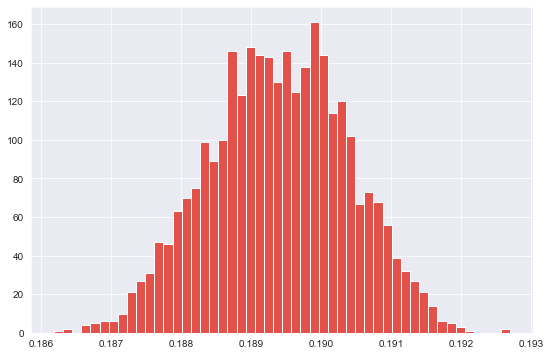

In [88]:
#Distribution of predicted Attrition_rate
submission['Attrition_rate'].hist(bins=50,figsize=(9,6))

In [90]:
submission.head(10)

,Employee_ID,Attrition_rate
0,EID_22713,0.191707
1,EID_9658,0.190327
2,EID_22203,0.188562
3,EID_7652,0.189952
4,EID_6516,0.190557
5,EID_20283,0.188115
6,EID_21014,0.190185
7,EID_7693,0.189865
8,EID_13232,0.190638
9,EID_6515,0.190588


In [91]:
submission.to_csv('submission1.csv',index=False)

<img src='score.png' />